In [70]:
import pandas as pd

data = pd.read_csv("./model/train.csv", sep="\t",header=None)
answer_train = pd.read_csv("./model/answer_train.csv")

In [71]:
data.columns=['id', 'filename', 'content']

In [72]:
data

,id,filename,content
0,0,..年双流区地方财政收入情况统计表_.csv,月份yuefen月增长率addpercent月增长addvalue序号xuhao同比增幅to...
1,1,.公交运行站点明细.xls,序号线路编号站点明细UnnamedUnnamedUnnamedUnnamedUnnamedU...
2,2,.各类中学经费规范总括表.xls,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...
3,3,.各类学校经费标准统计表.xls,成都市各级各类学校经费标准统计表UnnamedUnnamedUnnamedUnnamedUn...
4,4,.各类高中经费准则总计表.xls,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...
...,...,...,...
85454,25454,龙潭区市道路运输车辆综合性能检测机构名单_.xls,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...
85455,25455,龙陵县区法人行政许可数据.csv,许可机关审批类别许可内容许可决定日期行政许可决定文书号有效期时间戳法定代表人姓名法定代表人证...
85456,25456,龙陵县区职业学校一览表.csv,武汉市汉南区职业培训中学武汉市汉南区纱帽街育才路号严承艾
85457,25457,龙陵县市国内旅行社业务经营许可证信息_.xls,许可文号旅行社名称经营场所发证日期更新时间


In [73]:
train = data[:60000].copy()
test = data[60000:].copy()

In [74]:
def clean_str(text):
    text = text.replace("_.csv", "")
    text = text.replace("_.xls", "")
    text = text.replace(".csv", "")
    text = text.replace(".xls", "")
    text = text.replace("train/", "")
    return text

train['filename'] = train['filename'].apply(lambda x: clean_str(str(x)))
test['filename'] = test['filename'].apply(lambda x: clean_str(str(x)))
answer_train['filename'] = answer_train['filename'].apply(lambda x: clean_str(str(x)))

In [75]:
train['label'] = 0
train

,id,filename,content,label
0,0,..年双流区地方财政收入情况统计表,月份yuefen月增长率addpercent月增长addvalue序号xuhao同比增幅to...,0
1,1,.公交运行站点明细,序号线路编号站点明细UnnamedUnnamedUnnamedUnnamedUnnamedU...,0
2,2,.各类中学经费规范总括表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,0
3,3,.各类学校经费标准统计表,成都市各级各类学校经费标准统计表UnnamedUnnamedUnnamedUnnamedUn...,0
4,4,.各类高中经费准则总计表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,0
...,...,...,...,...
59995,59995,龙陵县市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,0
59996,59996,龙陵县民声阅办记录信息,codeerror无访问权限,0
59997,59997,龙陵县省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,0
59998,59998,龙陵县省城市空气质量发布数据_上饶市,首要污染物更新时间城市名称监测时间二氧化硫浓度二氧化氮浓度PM浓度,0


In [76]:
answer_train

,filename,label
0,市管宗教活动场所,文化休闲
1,南涧彝族自治县市汶上县残疾人联合会_残疾人证办理,医疗卫生
2,价格监测信息公开事项汇总信息,经济管理
3,县级公共图书馆文化馆总分馆制信息_大安市,文化休闲
4,县级公共图书馆文化馆总分馆制信息_陇南市武都区,文化休闲
...,...,...
59995,二季度行政处置状况公告信息,文秘行政
59996,社保_机关事业单位离退休人员及离休遗属增减，离退休费、离休人员抚恤金、丧葬费及遗属补助金发放,劳动人事
59997,托里县农林牧渔业产值,农业畜牧业
59998,设立经营性互联网文化单位审批_忻州市,文化休闲


In [77]:
from tqdm import tqdm

with tqdm(total = len(train)) as pbar:
    for i, row in train.iterrows():
        pbar.update(1)
        record = answer_train[answer_train['filename']==row['filename']]
        train.loc[i, 'label'] = record['label'].values[0]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [07:41<00:00, 130.02it/s]


In [78]:
import re

def clean_str(text, is_content=False):
    reg = "[^A-Za-z\u4e00-\u9fa5]" if not is_content else "[^\u4e00-\u9fa5]"
    text = re.sub(reg, '', text)
    text = re.sub("(年月){2,}", "年月", text)
    text = re.sub("(年){2,}", "年", text)
    return text

In [79]:
# 数据清洗
train['content'] = train['content'].apply(lambda x: clean_str(str(x), is_content=True))
train['filename'] = train['filename'].apply(lambda x: clean_str(str(x)))

In [80]:
test['content'] = test['content'].apply(lambda x: clean_str(str(x), is_content=True))
test['new_filename'] = test['filename'].apply(lambda x: clean_str(str(x)))

In [81]:
train

,id,filename,content,label
0,0,年双流区地方财政收入情况统计表,月份月增长率月增长序号同比增幅完成数其中本月完成数完成数累计月月月月,财税金融
1,1,公交运行站点明细,序号线路编号站点明细摆渡车新津大水南门南河新城客运中心三旺集团华润学校广播电视台林园路路口三...,交通运输
2,2,各类中学经费规范总括表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,财税金融
3,3,各类学校经费标准统计表,成都市各级各类学校经费标准统计表公用经费小学公办学校和接受政府委托接收义务教育任务的民办学校...,财税金融
4,4,各类高中经费准则总计表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,财税金融
...,...,...,...,...
59995,59995,龙陵县市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,交通运输
59996,59996,龙陵县民声阅办记录信息,无访问权限,文化休闲
59997,59997,龙陵县省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,工业
59998,59998,龙陵县省城市空气质量发布数据上饶市,首要污染物更新时间城市名称监测时间二氧化硫浓度二氧化氮浓度浓度,生态环境


In [82]:
# 分为两部分数据：标题和内容，训练集和测试集也分为两部分，有中文标题的训练集和有标题的测试集以及剩下的不是中文标题的
# 训练集和测试集
import re

def is_title(x):
    zhPattern = re.compile(u'[\u4e00-\u9fa5]+')
    if zhPattern.search(str(x)):
        return True
    else:
        return False
    
train

,id,filename,content,label
0,0,年双流区地方财政收入情况统计表,月份月增长率月增长序号同比增幅完成数其中本月完成数完成数累计月月月月,财税金融
1,1,公交运行站点明细,序号线路编号站点明细摆渡车新津大水南门南河新城客运中心三旺集团华润学校广播电视台林园路路口三...,交通运输
2,2,各类中学经费规范总括表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,财税金融
3,3,各类学校经费标准统计表,成都市各级各类学校经费标准统计表公用经费小学公办学校和接受政府委托接收义务教育任务的民办学校...,财税金融
4,4,各类高中经费准则总计表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,财税金融
...,...,...,...,...
59995,59995,龙陵县市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,交通运输
59996,59996,龙陵县民声阅办记录信息,无访问权限,文化休闲
59997,59997,龙陵县省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,工业
59998,59998,龙陵县省城市空气质量发布数据上饶市,首要污染物更新时间城市名称监测时间二氧化硫浓度二氧化氮浓度浓度,生态环境


In [83]:
train['name_is_title'] = train['filename'].apply(lambda x: is_title(str(x)))
train

,id,filename,content,label,name_is_title
0,0,年双流区地方财政收入情况统计表,月份月增长率月增长序号同比增幅完成数其中本月完成数完成数累计月月月月,财税金融,True
1,1,公交运行站点明细,序号线路编号站点明细摆渡车新津大水南门南河新城客运中心三旺集团华润学校广播电视台林园路路口三...,交通运输,True
2,2,各类中学经费规范总括表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,财税金融,True
3,3,各类学校经费标准统计表,成都市各级各类学校经费标准统计表公用经费小学公办学校和接受政府委托接收义务教育任务的民办学校...,财税金融,True
4,4,各类高中经费准则总计表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,财税金融,True
...,...,...,...,...,...
59995,59995,龙陵县市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,交通运输,True
59996,59996,龙陵县民声阅办记录信息,无访问权限,文化休闲,True
59997,59997,龙陵县省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,工业,True
59998,59998,龙陵县省城市空气质量发布数据上饶市,首要污染物更新时间城市名称监测时间二氧化硫浓度二氧化氮浓度浓度,生态环境,True


In [84]:
train_title = train[train['name_is_title'] == True].copy()

In [85]:
# 训练集
train_title.to_csv("./model/title/train_v1.csv", index=None, sep="\t")

In [86]:
test['name_is_title'] = test['filename'].apply(lambda x:is_title(str(x)))
test

,id,filename,content,new_filename,name_is_title
60000,0,0007b95ae51a2864b9ee8653a206dc4e,分类学校名称阶段规范化山东省青岛第二卫生学校认定通过学校示范性淄博信息工程学校规范化滨州航空...,baeabeeadce,False
60001,1,00091d5af09e3405b4a5109a95ced0b1,于波山东省青岛市莱西市炉上村村东青岛车竞速汽车服务有限公司机动车整车修理总成修理整车维护小修...,dafebaacedb,False
60002,2,000a938757c7559c7e995c2a705d3a73,开发区大季家街道办事处烟台经济技术开发区大季家医院开发区泰山路号烟台业达医院烟台开发区长江路...,accecada,False
60003,3,000fe94361930432ee16b9282759adda,序号线路实际运行时间首站发车时间末站发车时间途径站点执行票价票价模式售票方式华财古玩城三乡医...,feeebadda,False
60004,4,0012236cf3a1421fde22f8768be08cb0,揭阳市国控污染物自动监控信息关注程度国控省控市控非重点污染源类别一般工业企业小型三产建筑施工...,cfafdefbecb,False
...,...,...,...,...,...
85454,25454,龙潭区市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,龙潭区市道路运输车辆综合性能检测机构名单,True
85455,25455,龙陵县区法人行政许可数据,许可机关审批类别许可内容许可决定日期行政许可决定文书号有效期时间戳法定代表人姓名法定代表人证...,龙陵县区法人行政许可数据,True
85456,25456,龙陵县区职业学校一览表,武汉市汉南区职业培训中学武汉市汉南区纱帽街育才路号严承艾,龙陵县区职业学校一览表,True
85457,25457,龙陵县市国内旅行社业务经营许可证信息,许可文号旅行社名称经营场所发证日期更新时间,龙陵县市国内旅行社业务经营许可证信息,True


In [87]:
test_title = test[test['name_is_title'] == True].copy()
test_content = test[test['name_is_title'] == False].copy()
test_title

,id,filename,content,new_filename,name_is_title
71712,11712,_ 行政惩办信息,新府办号无云浮市司法局罚款正常中华人民共和国公证法第二十三条中华人民共和国公证法第四十二条第...,行政惩办信息,True
71713,11713,七里河区市广东省名牌产品工业类称号信息,企业名称注册商标获评年份更新时间,七里河区市广东省名牌产品工业类称号信息,True
71714,11714,七里河区省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,七里河区省人防资质监理企业名录,True
71715,11715,万宁市信访局基本信息,常州市信访局常州市龙城大道号行政中心号楼,万宁市信访局基本信息,True
71716,11716,万宁市季度地区生产总值,季度地区生产总值时间常州市第一产业第二产业第三产业总量增速总量增速总量增速总量增速累计累计增...,万宁市季度地区生产总值,True
...,...,...,...,...,...
85454,25454,龙潭区市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,龙潭区市道路运输车辆综合性能检测机构名单,True
85455,25455,龙陵县区法人行政许可数据,许可机关审批类别许可内容许可决定日期行政许可决定文书号有效期时间戳法定代表人姓名法定代表人证...,龙陵县区法人行政许可数据,True
85456,25456,龙陵县区职业学校一览表,武汉市汉南区职业培训中学武汉市汉南区纱帽街育才路号严承艾,龙陵县区职业学校一览表,True
85457,25457,龙陵县市国内旅行社业务经营许可证信息,许可文号旅行社名称经营场所发证日期更新时间,龙陵县市国内旅行社业务经营许可证信息,True


In [88]:
test_content

,id,filename,content,new_filename,name_is_title
60000,0,0007b95ae51a2864b9ee8653a206dc4e,分类学校名称阶段规范化山东省青岛第二卫生学校认定通过学校示范性淄博信息工程学校规范化滨州航空...,baeabeeadce,False
60001,1,00091d5af09e3405b4a5109a95ced0b1,于波山东省青岛市莱西市炉上村村东青岛车竞速汽车服务有限公司机动车整车修理总成修理整车维护小修...,dafebaacedb,False
60002,2,000a938757c7559c7e995c2a705d3a73,开发区大季家街道办事处烟台经济技术开发区大季家医院开发区泰山路号烟台业达医院烟台开发区长江路...,accecada,False
60003,3,000fe94361930432ee16b9282759adda,序号线路实际运行时间首站发车时间末站发车时间途径站点执行票价票价模式售票方式华财古玩城三乡医...,feeebadda,False
60004,4,0012236cf3a1421fde22f8768be08cb0,揭阳市国控污染物自动监控信息关注程度国控省控市控非重点污染源类别一般工业企业小型三产建筑施工...,cfafdefbecb,False
...,...,...,...,...,...
71707,11707,ffd948f8dcca15756261e56dec20c8b9,学校联系方式纱帽中学邓南中心小学杨校长吴校长江校长,ffdfdccaedeccb,False
71708,11708,ffe258e052d6a6988e41bf0f98ecc758,序号地区年度月份小升规入库培育企业任务数实际入库数入库率填报数填报率景宁县月莲都区月松阳县月...,ffeedaebffecc,False
71709,11709,ffe621f1538a187ecf880329ff557998,天津市科学技术奖年度奖种奖级序号奖励编号项目名称获奖单位获奖人科技重大成就奖无无天津大学陈予...,ffefaecfff,False
71710,11710,ffe9230beb745e63473247187454366c,单位名称统一社会信用代码信用等级评价时间连云港市福利生产管理中心连云港市体育运动学校江苏省广...,ffebebec,False


In [89]:
test_title.to_csv("./model/title/test_title_v1.csv", index=None, sep="\t")
test_content.to_csv("./model/content/test_content_v1.csv", index=None, sep="\t")

In [90]:
train['len_title'] = train['filename'].apply(lambda x: len(x))
train['len_content'] = train['content'].apply(lambda x: len(x))
test['len'] = test['content'].apply(lambda x: len(x))

<AxesSubplot:xlabel='len_title'>

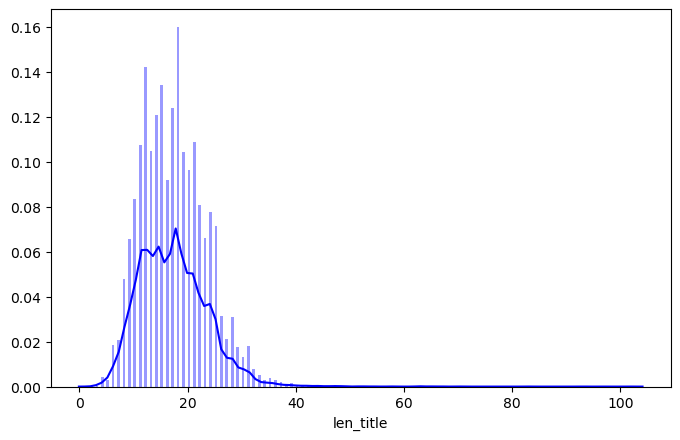

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5), dpi=100)
sns.distplot(train.len_title, bins=200, color='blue')


In [92]:
# 截断长度设为
sorted(train['len_title'])[int(len(train)*0.995)]

38

In [93]:
train[train['len_title'] == 2]

,id,filename,content,label,name_is_title,len_title,len_content
9757,9757,医院,机构名称机构地址机构级别床位数牙椅数备注一成都锦江益民医院锦江区经天路号未定级成都市锦江区肛...,医疗卫生,True,2,131
19483,19483,小学,序号学校名称地址电话学校类别北京市海淀区花园村第二小学潘庄校区北京市海淀区潘庄号小学北京市东...,教育科技,True,2,122
27587,27587,报纸,周一周五报滨州日报社滨州广播电视总台鲁北晚报季刊滨州医学院滨州医学院学报季刊滨州学院滨州学院...,文化休闲,True,2,60
47075,47075,省道,一二级下营小关一二级央子赣榆二级青州周村一二级黄河口临朐,交通运输,True,2,28
47422,47422,社团,成员组织社会团体台卡民间非营利组织会计制度高新区社会事业局可不建是团体会员个人会员捐赠收入会...,文化休闲,True,2,107
48601,48601,网吧,万佳网络金世纪店郭小红寿光市建新街化肥厂路口东侧文化娱乐万佳网络清华店杨艺寿光市孙集街办寿尧...,文化休闲,True,2,108
52451,52451,诊所,机构名称机构地址机构类别诊疗科目名称诊疗科目代码成都锦江馨源口腔诊所锦江区月季街号口腔诊所口...,医疗卫生,True,2,204


<AxesSubplot:xlabel='len_content'>

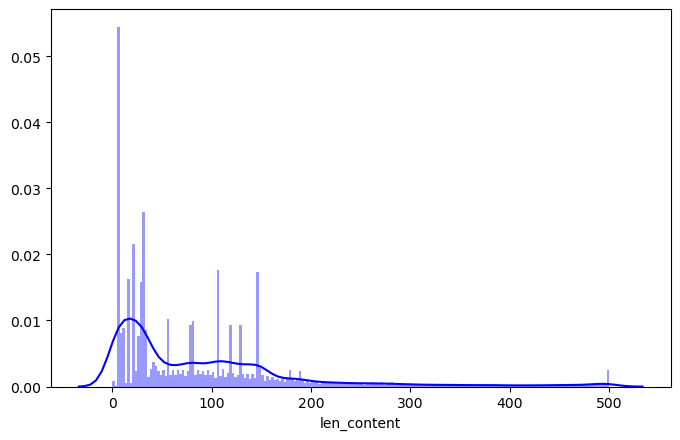

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5), dpi=100)
sns.distplot(train.len_content, bins=200, color='blue')


<AxesSubplot:xlabel='len'>

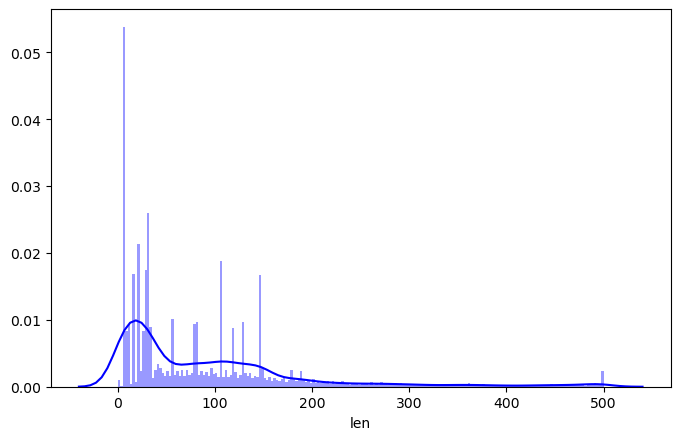

In [95]:
plt.figure(figsize=(8,5), dpi=100)
sns.distplot(test.len, bins=200, color='blue')


In [96]:
import pandas as pd

# 过滤一下训练集里面无访问权限的文件用于内容预测
content = pd.read_csv("./model/content/train_v1.csv", sep='\t')
content

,id,filename,content,label
0,0,年双流区地方财政收入情况统计表,月份月增长率月增长序号同比增幅完成数其中本月完成数完成数累计月月月月,18
1,1,公交运行站点明细,序号线路编号站点明细摆渡车新津大水南门南河新城客运中心三旺集团华润学校广播电视台林园路路口三...,7
2,2,各类中学经费规范总括表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,18
3,3,各类学校经费标准统计表,成都市各级各类学校经费标准统计表公用经费小学公办学校和接受政府委托接收义务教育任务的民办学校...,18
4,4,各类高中经费准则总计表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,18
...,...,...,...,...
53016,59992,龙陵县市国有演出剧场情况,标题附件时间,0
53017,59993,龙陵县市广东省名牌产品工业类称号信息,企业名称注册商标获评年份更新时间,5
53018,59995,龙陵县市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,7
53019,59997,龙陵县省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,5


In [97]:
content['access'] = (content['content'] == '无访问权限')

In [98]:
content = content[content['access'] == False].copy()
content

,id,filename,content,label,access
0,0,年双流区地方财政收入情况统计表,月份月增长率月增长序号同比增幅完成数其中本月完成数完成数累计月月月月,18,False
1,1,公交运行站点明细,序号线路编号站点明细摆渡车新津大水南门南河新城客运中心三旺集团华润学校广播电视台林园路路口三...,7,False
2,2,各类中学经费规范总括表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,18,False
3,3,各类学校经费标准统计表,成都市各级各类学校经费标准统计表公用经费小学公办学校和接受政府委托接收义务教育任务的民办学校...,18,False
4,4,各类高中经费准则总计表,成都市各级各类学校经费标准统计表编制时间年月编制单位财务管理处单位元生年学校类别学校资格政策...,18,False
...,...,...,...,...,...
53016,59992,龙陵县市国有演出剧场情况,标题附件时间,0,False
53017,59993,龙陵县市广东省名牌产品工业类称号信息,企业名称注册商标获评年份更新时间,5,False
53018,59995,龙陵县市道路运输车辆综合性能检测机构名单,序号企业名称经营地址检验检测能力综检安检环检业务联系人业务联系电话汕尾市道路运输车辆综合性能...,7,False
53019,59997,龙陵县省人防资质监理企业名录,所属设区市企业名称法人代表证件编号资质等级联系电话有效期至备注,5,False


In [99]:
del content['access']
content.to_csv("./model/content/train_v1.csv", sep='\t', index=None)

In [100]:
# 预测提交的两个文件分开
test = data[60000:].copy()
test['name_is_title'] = test['filename'].apply(lambda x: is_title(str(x)))
submit_title = test[test['name_is_title'] == True].copy()
submit_content = test[test['name_is_title'] == False].copy()
submit_title.to_csv("./model/title/test_title_v1.csv", index=None, sep="\t")
submit_content.to_csv("./model/content/test_content_v1.csv", index=None, sep="\t")